<a href="https://colab.research.google.com/github/winnie-u/My-1st-repo/blob/master/knn_along_with_showing_iterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [0]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
df2 = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = df2.values

train = df3.values


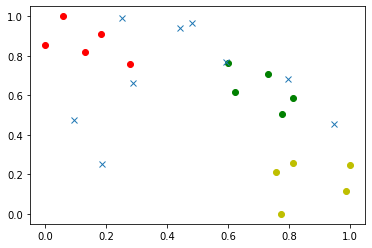

In [21]:
labels = train[:,0]
train = train[:,1:]
x = train[labels == 0]
y = train[labels == 1]
z = train[labels == 2]
plt.plot(x[:,0],x[:,1],'ro')
plt.plot(y[:,0],y[:,1],'go')
plt.plot(z[:,0],z[:,1],'yo')
plt.plot(test[:,0],test[:,1],'x')
plt.show()

In [22]:
a = test[:,0:]
b = train
e = cdist(test,train)
k = e.argsort(axis = 1) #labels are sorted
#k the number of neighbours = 5
s= k[:,:5]
labels[s]


array([[1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0.],
       [0., 1., 2., 0., 2.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [1., 1., 2., 2., 2.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [29]:
from scipy import stats
mode = stats.mode(labels[s],axis=1)
w = mode[0]
u = w.reshape(-1)
print(u)


[1. 1. 0. 1. 0. 2. 0. 0. 0.]


[[0.18733338 0.25101217]
 [0.28757313 0.65992994]
 [0.25108305 0.98923339]
 [0.4424671  0.93948397]
 [0.09469225 0.47709481]]


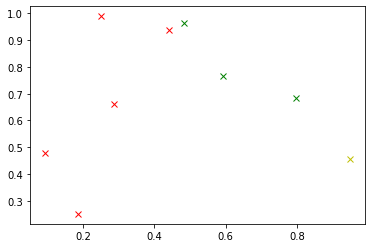

In [27]:
q = test[u==0]
r = test[u==1]
t = test[u==2]
plt.plot(q[:,0],q[:,1],'rx')
plt.plot(r[:,0],r[:,1],'gx')
plt.plot(t[:,0],t[:,1],'yx')
plt.show()

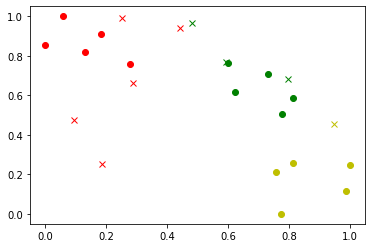

In [25]:
#plotting the whole thing together
plt.plot(x[:,0],x[:,1],'ro')
plt.plot(y[:,0],y[:,1],'go')
plt.plot(z[:,0],z[:,1],'yo')
plt.plot(q[:,0],q[:,1],'rx')
plt.plot(r[:,0],r[:,1],'gx')
plt.plot(t[:,0],t[:,1],'yx')
plt.show()

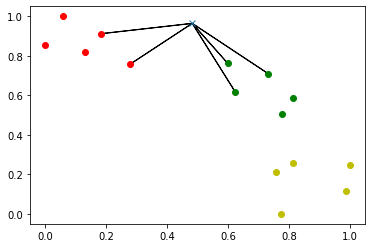

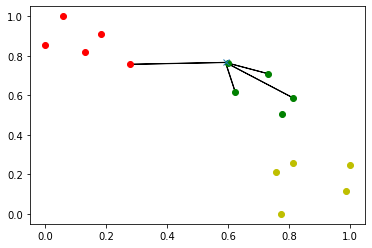

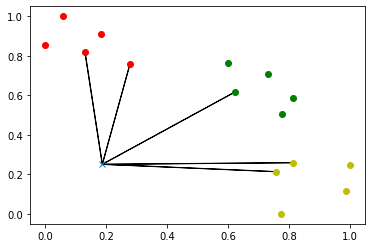

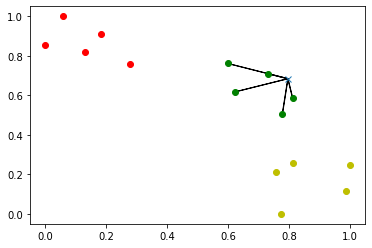

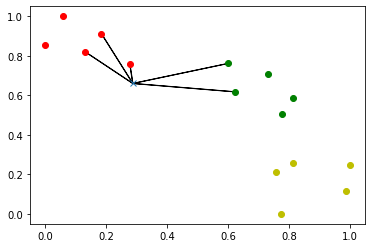

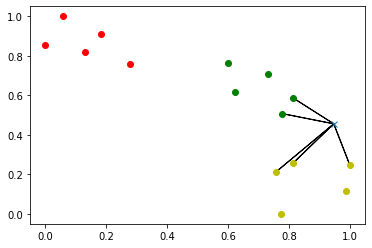

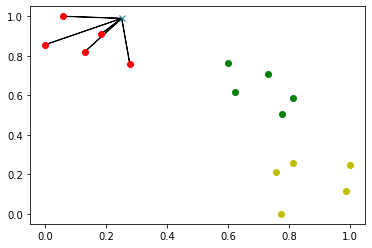

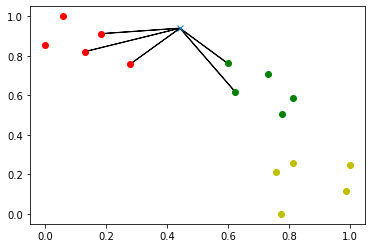

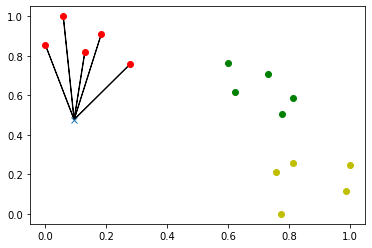

In [32]:
#Arrows
a1 = train[s[0]]

for i in range(9):
    plt.plot(x[:,0],x[:,1],'ro')
    plt.plot(y[:,0],y[:,1],'go')
    plt.plot(z[:,0],z[:,1],'yo')
    plt.plot(test[i,0],test[i,1],'x')
    a1 = train[s[i,:5]]
    for j in range(5):
        plt.arrow(test[i][0],test[i][1],(a1[j][0]-test[i][0]),(a1[j][1]-test[i][1]))
    plt.show()   